In [71]:
import os 
import zipfile
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

from sklearn.metrics import r2_score

In [70]:
od = pd.read_csv(r"C:\Data\PseudoPFLOW\processing\city_census_od.csv")
od= od.groupby(['city1', 'city2'])['volume'].sum().reset_index()
od

city1  city2  volume
0        1101   1101   69157
1        1101   1102    5990
2        1101   1103    3462
3        1101   1104    3177
4        1101   1105    3564
...       ...    ...     ...
321219  47382  28107       1
321220  47382  28206       1
321221  47382  47207       1
321222  47382  47208       2
321223  47382  47382    1316

[321224 rows x 3 columns]

In [ ]:
zip_path = 'japan_ver85.zip'
extract_path = 'japan_shapefile'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [33]:
for file in os.listdir(extract_path):
    if file.endswith('.shp'):
        shp_file = os.path.join(extract_path, file)
        break

gdf_city = gpd.read_file(shp_file)
gdf_city

JCODE  KEN  SICHO   GUN SEIREI SIKUCHOSON                   CITY_ENG  \
0     01101  ÂåóÊµ∑ÈÅì  Áü≥Áã©ÊåØËààÂ±Ä  None    Êú≠ÂπåÂ∏Ç        ‰∏≠Â§ÆÂå∫       Sapporo-shi, Chuo-ku   
1     01102  ÂåóÊµ∑ÈÅì  Áü≥Áã©ÊåØËààÂ±Ä  None    Êú≠ÂπåÂ∏Ç         ÂåóÂå∫       Sapporo-shi, Kita-ku   
2     01103  ÂåóÊµ∑ÈÅì  Áü≥Áã©ÊåØËààÂ±Ä  None    Êú≠ÂπåÂ∏Ç         Êù±Âå∫    Sapporo-shi, Higashi-ku   
3     01104  ÂåóÊµ∑ÈÅì  Áü≥Áã©ÊåØËààÂ±Ä  None    Êú≠ÂπåÂ∏Ç        ÁôΩÁü≥Âå∫  Sapporo-shi, Shiroishi-ku   
4     01105  ÂåóÊµ∑ÈÅì  Áü≥Áã©ÊåØËààÂ±Ä  None    Êú≠ÂπåÂ∏Ç        Ë±äÂπ≥Âå∫   Sapporo-shi, Toyohira-ku   
...     ...  ...    ...   ...    ...        ...                        ...   
1902  47362  Ê≤ñÁ∏ÑÁúå   None   Â≥∂Â∞ªÈÉ°   None       ÂÖ´ÈáçÁÄ¨Áî∫                  Yaese-cho   
1903  47375  Ê≤ñÁ∏ÑÁúå   None   ÂÆÆÂè§ÈÉ°   None       Â§öËâØÈñìÊùë                 Tarama-son   
1904  47381  Ê≤ñÁ∏ÑÁúå   None  ÂÖ´ÈáçÂ±±ÈÉ°   None        Á´πÂØåÁî∫               Taketomi-cho   
1905  47382  Ê≤ñÁ∏ÑÁúå   None  ÂÖ´ÈáçÂ±±ÈÉ°   None       ‰∏éÈÇ£ÂõΩÁî∫               Yonaguni-cho   
1906   None  Ê≤ñÁ∏ÑÁúå   None  None   None      ÊâÄÂ±û‰∏çÊòéÂú∞                       None   

       P_NUM   H_NUM  Shape_Leng  Shape_Area  \
0     248680  141429    0.542590    0.005128   
1     289323  139675    0.567773    0.007031   
2     265379  131188    0.397203    0.006289   
3     211835  108233    0.308211    0.003815   
4     225298  118650    0.428316    0.005101   
...      ...     ...         ...         ...   
1902   30941   10680    0.288020    0.002441   
1903    1058     466    0.247357    0.001956   
1904    3942    2093    2.158236    0.029741   
1905    1676     760    0.314766    0.002570   
1906       0       0    0.016856    0.000016   

                                               geometry  
0     POLYGON ((141.34233 43.06682, 141.3552 43.0685...  
1     POLYGON ((141.40839 43.18395, 141.40427 43.182...  
2     POLYGON ((141.44698 43.15513, 141.4486 43.1532...  
3     POLYGON ((141.46569 43.1, 141.46812 43.09704, ...  
4     POLYGON ((141.38479 43.0466, 141.38558 43.0472...  
...                                                 ...  
1902  MULTIPOLYGON (((127.76117 26.124, 127.76255 26...  
1903  MULTIPOLYGON (((124.73021 24.64206, 124.73135 ...  
1904  MULTIPOLYGON (((123.76601 24.06841, 123.7638 2...  
1905  MULTIPOLYGON (((123.00349 24.47277, 123.00128 ...  
1906  POLYGON ((127.84164 26.43531, 127.84295 26.437...  

[1907 rows x 12 columns]

In [35]:
city_field = 'JCODE'

df_commute = shizuoka[shizuoka['puropse'].isin([2, 3])].copy()

gdf_origin = gpd.GeoDataFrame(
    df_commute,
    geometry=gpd.points_from_xy(df_commute['origin_lon'], df_commute['origin_lat']),
    crs=gdf_city.crs
)

gdf_dest = gpd.GeoDataFrame(
    df_commute.copy(),
    geometry=gpd.points_from_xy(df_commute['destn_lon'], df_commute['destn_lat']),
    crs=gdf_city.crs
)

gdf_origin = gpd.sjoin(gdf_origin, gdf_city[[city_field, 'geometry']], how='left', predicate='within')
gdf_origin.rename(columns={city_field: 'origin_city'}, inplace=True)

gdf_dest = gpd.sjoin(gdf_dest, gdf_city[[city_field, 'geometry']], how='left', predicate='within')
gdf_dest.rename(columns={city_field: 'destn_city'}, inplace=True)

df_commute['origin_city'] = gdf_origin['origin_city'].values
df_commute['destn_city'] = gdf_dest['destn_city'].values

od_city_counts = df_commute.groupby(['origin_city', 'destn_city']).size().reset_index(name='count')

print(od_city_counts.head(10))
od_city_counts.to_csv('citylevel_commute_od.csv', index=False, encoding='utf-8-sig')

  origin_city destn_city  count
0       11102      11219      1
1       11105      11104      1
2       11105      11105      1
3       11105      13101      2
4       11107      11107      1
5       11108      13102      1
6       11109      11109      1
7       11109      13103      1
8       11202      11202      1
9       11203      11105      1


In [36]:
od_city_counts

origin_city destn_city  count
0          11102      11219      1
1          11105      11104      1
2          11105      11105      1
3          11105      13101      2
4          11107      11107      1
...          ...        ...    ...
4998       24202      24202      1
4999       24203      24203      1
5000       24211      24211      2
5001       24303      23109      1
5002       24324      23225      1

[5003 rows x 3 columns]

In [53]:
pseudo_od = od_city_counts
pseudo_od.rename(columns={'origin_city': 'city1', 'destn_city': 'city2', 'count': 'pseudo_volume'}, inplace=True)

real_od = od
real_od.rename(columns={'volume': 'real_volume'}, inplace=True)

pseudo_od['city1'] = pseudo_od['city1'].astype(str)
pseudo_od['city2'] = pseudo_od['city2'].astype(str)

real_od['city1'] = real_od['city1'].astype(str)
real_od['city2'] = real_od['city2'].astype(str)

pseudo_od = pseudo_od[pseudo_od['city1'].str.startswith('22') & (pseudo_od['city1'].str.len() == 5)]
real_od = real_od[real_od['city1'].str.startswith('22') & (real_od['city1'].str.len() == 5)]

od_compare = pd.merge(pseudo_od, real_od, on=['city1', 'city2'], how='outer')

In [54]:
od_compare

city1  city2  pseudo_volume  real_volume
0     22101  10201            NaN          3.0
1     22101  10202            NaN          1.0
2     22101  10203            NaN          2.0
3     22101  10207            NaN          1.0
4     22101  10209            NaN          1.0
...     ...    ...            ...          ...
9352  22461  28202            NaN          1.0
9353  22461   4214            NaN          1.0
9354  22461  46218            NaN          1.0
9355  22461  47209            NaN          1.0
9356  22461  47213            NaN          1.0

[9357 rows x 4 columns]

In [55]:
od_compare = pd.merge(pseudo_od, real_od, on=['city1', 'city2'], how='outer')


od_compare['pseudo_volume'] = od_compare['pseudo_volume'].fillna(0)
od_compare['real_volume'] = od_compare['real_volume'].fillna(0)


od_compare['diff'] = od_compare['pseudo_volume'] - od_compare['real_volume']
od_compare['abs_diff'] = od_compare['diff'].abs()


od_compare['rel_error'] = od_compare.apply(
    lambda row: row['diff'] / row['real_volume'] if row['real_volume'] != 0 else None,
    axis=1
)

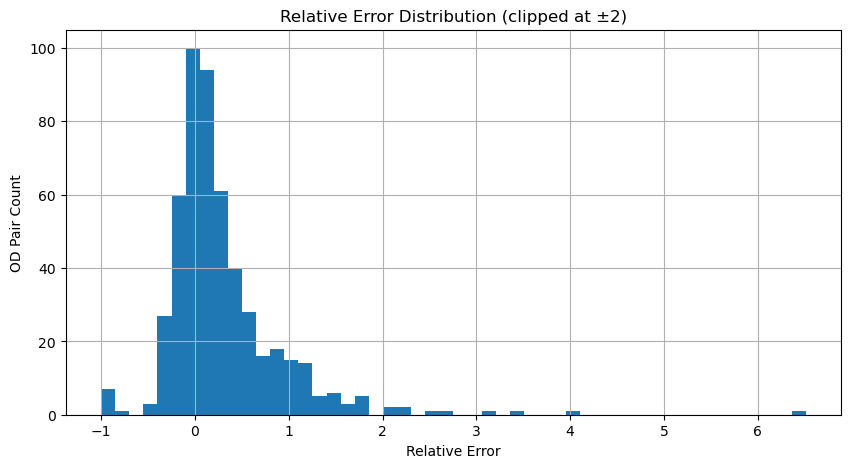

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
od_compare[od_compare['real_volume']>100]['rel_error'].dropna().clip(-2, 10).hist(bins=50)
plt.title('Relative Error Distribution (clipped at ¬±2)')
plt.xlabel('Relative Error')
plt.ylabel('OD Pair Count')
plt.grid(True)
plt.show()

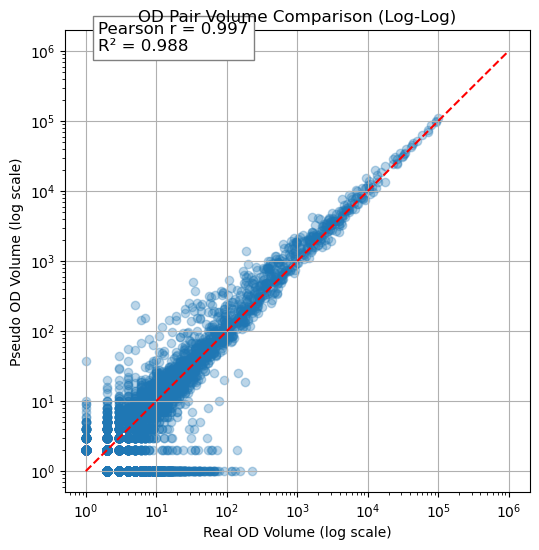

In [76]:
valid = od_compare[(od_compare['real_volume'] > 0) & (od_compare['pseudo_volume'] > 0)]
r2 = r2_score(valid['real_volume'], valid['pseudo_volume'])

valid = od_compare[(od_compare['real_volume'] > 0) & (od_compare['pseudo_volume'] > 0)]
r, p_value = pearsonr(valid['real_volume'], valid['pseudo_volume'])


plt.figure(figsize=(6, 6))
plt.scatter(
    od_compare['real_volume'] + 1,
    od_compare['pseudo_volume'] + 1,
    alpha=0.3
)
plt.xscale('log')
plt.yscale('log')
plt.plot([1, 1e6], [1, 1e6], 'r--')  # y = x line
plt.text(1.5, 1e6, f'Pearson r = {r:.3f}\nR¬≤ = {r2:.3f}', fontsize=12,
         bbox=dict(facecolor='white', edgecolor='gray'))
plt.xlabel('Real OD Volume (log scale)')
plt.ylabel('Pseudo OD Volume (log scale)')
plt.title('OD Pair Volume Comparison (Log-Log)')
plt.grid(True)
plt.show()

In [80]:
od_compare[(od_compare['real_volume']>20)&(od_compare['pseudo_volume']<2)]

city1  city2  pseudo_volume  real_volume   diff  abs_diff  rel_error
60    22101  13101            0.0        152.0 -152.0     152.0  -1.000000
61    22101  13102            0.0         72.0  -72.0      72.0  -1.000000
62    22101  13103            0.0        114.0 -114.0     114.0  -1.000000
63    22101  13104            0.0         58.0  -58.0      58.0  -1.000000
64    22101  13105            0.0         26.0  -26.0      26.0  -1.000000
...     ...    ...            ...          ...    ...       ...        ...
6135  22214  23106            0.0         22.0  -22.0      22.0  -1.000000
6690  22216  23106            1.0         23.0  -22.0      22.0  -0.956522
7046  22220  23211            0.0         25.0  -25.0      25.0  -1.000000
7762  22225  13101            1.0         58.0  -57.0      57.0  -0.982759
8743  22342  13108            0.0         28.0  -28.0      28.0  -1.000000

[91 rows x 7 columns]

In [98]:
od_compare['pseudo_volume'].sum() / od_compare['real_volume'].sum()

1.102943740137129

In [88]:
def extract_pref_code(city_code):
    if isinstance(city_code, str):
        if len(city_code) == 5:
            return city_code[:2]
        elif len(city_code) == 4:
            return city_code[:1]
    return None

# Áªü‰∏ÄÊï∞ÊçÆÁ±ªÂûã
pseudo_od['city1'] = pseudo_od['city1'].astype(str)
pseudo_od['city2'] = pseudo_od['city2'].astype(str)
real_od['city1'] = real_od['city1'].astype(str)
real_od['city2'] = real_od['city2'].astype(str)

# ÊèêÂèñÈÉΩÈÅìÂ∫úÁúå„Ç≥„Éº„Éâ
pseudo_od['to_pref'] = pseudo_od['city2'].apply(extract_pref_code)
real_od['to_pref'] = real_od['city2'].apply(extract_pref_code)

# ËøáÊª§ÈùôÂ≤°ÁúåÁô∫Ôºàcity1 ‰ª• '22' ÂºÄÂ§¥ ‰∏îÈïøÂ∫¶‰∏∫5Ôºâ
pseudo_shizuoka = pseudo_od[(pseudo_od['city1'].str.startswith('22')) & (pseudo_od['city1'].str.len() == 5)]
real_shizuoka = real_od[(real_od['city1'].str.startswith('22')) & (real_od['city1'].str.len() == 5)]

# ÈõÜË®à by destination prefecture
pseudo_pref_dist = pseudo_shizuoka.groupby('to_pref')['pseudo_volume'].sum()
real_pref_dist = real_shizuoka.groupby('to_pref')['real_volume'].sum()

# ÂêàÂπ∂Âπ∂ÂΩí‰∏ÄÂåñ‰∏∫ÁôæÂàÜÊØî
compare_pref_dist = pd.concat([pseudo_pref_dist, real_pref_dist], axis=1, sort=True).fillna(0)
compare_pref_dist.columns = ['pseudo_volume', 'real_volume']

compare_pref_dist['pseudo_pct'] = compare_pref_dist['pseudo_volume'] / compare_pref_dist['pseudo_volume'].sum()
compare_pref_dist['real_pct'] = compare_pref_dist['real_volume'] / compare_pref_dist['real_volume'].sum()
compare_pref_dist['diff_pct'] = compare_pref_dist['pseudo_pct'] - compare_pref_dist['real_pct']
compare_pref_dist['abs_diff'] = compare_pref_dist['diff_pct'].abs()

# ÁôæÂàÜÊØîÁªìÊûúËΩ¨‰∏∫ÁôæÂàÜÊï∞Ê†ºÂºè‰æø‰∫éËØª
compare_pref_dist_pct = compare_pref_dist.copy()
compare_pref_dist_pct[['pseudo_pct', 'real_pct', 'diff_pct']] *= 100

# ÊéíÂ∫èÂ±ïÁ§∫ÊúÄÂ§ßÁöÑÂ∑ÆÂºÇ
compare_pref_dist_pct = compare_pref_dist_pct.sort_values('abs_diff', ascending=False)


C:\Users\cyoudai\AppData\Local\Temp\2\ipykernel_6628\2883742190.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pseudo_od['city1'] = pseudo_od['city1'].astype(str)
C:\Users\cyoudai\AppData\Local\Temp\2\ipykernel_6628\2883742190.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pseudo_od['city2'] = pseudo_od['city2'].astype(str)
C:\Users\cyoudai\AppData\Local\Temp\2\ipykernel_6628\2883742190.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

<Axes: title={'center': 'Shizuoka-Origin OD by Destination Prefecture (%)'}, xlabel='to_pref'>

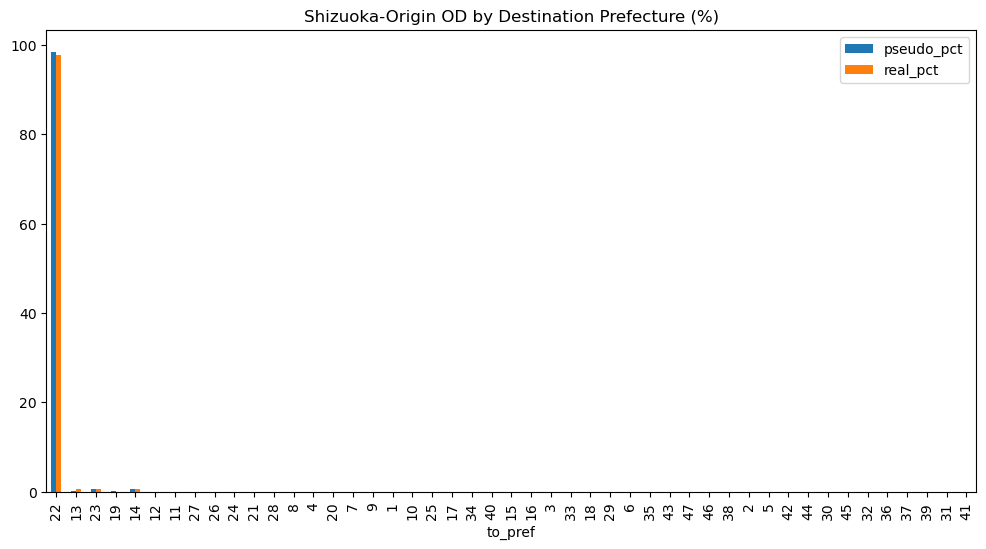

In [89]:
compare_pref_dist_pct[['pseudo_pct', 'real_pct']].plot(kind='bar', figsize=(12,6), title='Shizuoka-Origin OD by Destination Prefecture (%)')

<Axes: title={'center': 'Shizuoka-Origin OD by Destination Prefecture (%)'}, xlabel='to_pref'>

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

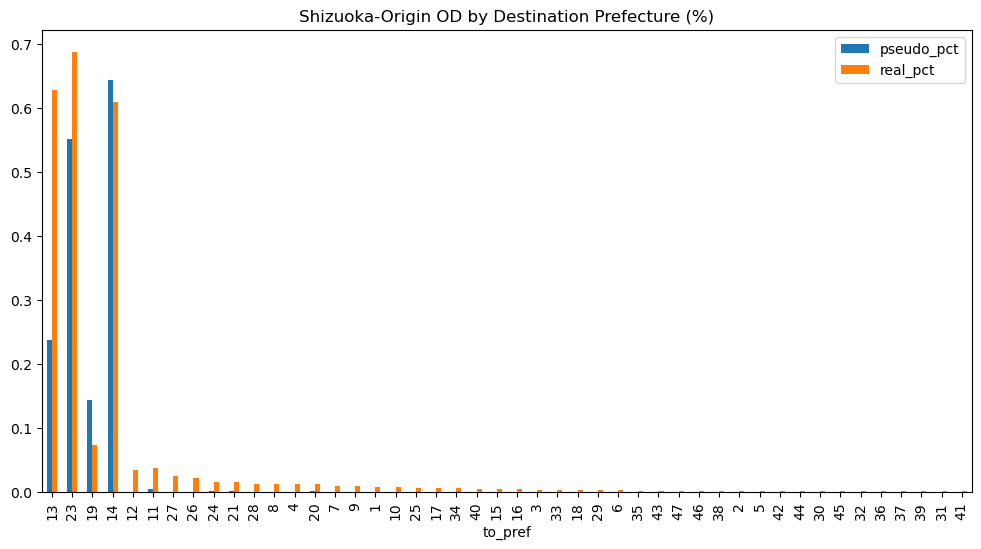

In [103]:
compare_pref_dist_pct[compare_pref_dist_pct['pseudo_pct']<90][['pseudo_pct', 'real_pct']].plot(kind='bar', figsize=(12,6), title='Shizuoka-Origin OD by Destination Prefecture (%)')

In [91]:
compare_pref_dist_pct[['pseudo_pct', 'real_pct']]

pseudo_pct   real_pct
to_pref                       
22        98.415798  97.704512
13         0.237316   0.628546
23         0.551325   0.688070
19         0.143902   0.072814
14         0.644053   0.609951
12         0.000367   0.034462
11         0.004261   0.037594
27         0.000000   0.024861
26         0.000000   0.021374
24         0.000779   0.015866
21         0.001466   0.015715
28         0.000000   0.011824
8          0.000000   0.011723
4          0.000000   0.011571
20         0.000733   0.011672
7          0.000000   0.009702
9          0.000000   0.008439
1          0.000000   0.007984
10         0.000000   0.006872
25         0.000000   0.006771
17         0.000000   0.006569
34         0.000000   0.005659
40         0.000000   0.003992
15         0.000000   0.003941
16         0.000000   0.003790
3          0.000000   0.003436
33         0.000000   0.003133
18         0.000000   0.002981
29         0.000000   0.002830
6          0.000000   0.002173
35         0.000000   0.002021
43         0.000000   0.001870
47         0.000000   0.001667
46         0.000000   0.001516
38         0.000000   0.001364
2          0.000000   0.001364
5          0.000000   0.001314
42         0.000000   0.001162
44         0.000000   0.001162
30         0.000000   0.001061
45         0.000000   0.001061
32         0.000000   0.001061
36         0.000000   0.001011
37         0.000000   0.000960
39         0.000000   0.000910
31         0.000000   0.000859
41         0.000000   0.000808

In [92]:
# ‰ªé pseudo_od Âíå real_od ‰∏≠ÂàÜÂà´Á≠õÈÄâÈùôÂ≤°Áô∫ÁöÑËÆ∞ÂΩï
pseudo_shizuoka = pseudo_od[(pseudo_od['city1'].str.startswith('22')) & (pseudo_od['city1'].str.len() == 5)]
real_shizuoka = real_od[(real_od['city1'].str.startswith('22')) & (real_od['city1'].str.len() == 5)]

# ÁªüËÆ° pseudo ‰∏≠Â∏ÇÂÜÖ vs Â∏ÇÂ§ñ
pseudo_within = pseudo_shizuoka[pseudo_shizuoka['city1'] == pseudo_shizuoka['city2']]['pseudo_volume'].sum()
pseudo_total = pseudo_shizuoka['pseudo_volume'].sum()
pseudo_ratio = pseudo_within / pseudo_total

# ÁªüËÆ° real ‰∏≠Â∏ÇÂÜÖ vs Â∏ÇÂ§ñ
real_within = real_shizuoka[real_shizuoka['city1'] == real_shizuoka['city2']]['real_volume'].sum()
real_total = real_shizuoka['real_volume'].sum()
real_ratio = real_within / real_total

# ËæìÂá∫ÁªìÊûú
print(f"„ÄêPseudo„ÄëÂ∏ÇÂÜÖÁßªÂãïÂç†ÊØî: {pseudo_ratio:.2%}Ôºà{pseudo_within:.0f}/{pseudo_total:.0f}Ôºâ")
print(f"„ÄêReal„Äë  Â∏ÇÂÜÖÁßªÂãïÂç†ÊØî: {real_ratio:.2%}Ôºà{real_within:.0f}/{real_total:.0f}Ôºâ")

„ÄêPseudo„ÄëÂ∏ÇÂÜÖÁßªÂãïÂç†ÊØî: 59.46%Ôºà1297790/2182740Ôºâ
„ÄêReal„Äë  Â∏ÇÂÜÖÁßªÂãïÂç†ÊØî: 62.63%Ôºà1239440/1979013Ôºâ


In [93]:
# ÂÅáËÆæ pseudo_od Âíå real_od Â∑≤ÁªèËØªÂèñ
pseudo_od['city1'] = pseudo_od['city1'].astype(str)
pseudo_od['city2'] = pseudo_od['city2'].astype(str)
real_od['city1'] = real_od['city1'].astype(str)
real_od['city2'] = real_od['city2'].astype(str)

# ËøáÊª§ÈùôÂ≤°Áô∫ËÆ∞ÂΩï
pseudo_shizuoka = pseudo_od[(pseudo_od['city1'].str.startswith('22')) & (pseudo_od['city1'].str.len() == 5)].copy()
real_shizuoka = real_od[(real_od['city1'].str.startswith('22')) & (real_od['city1'].str.len() == 5)].copy()

# ÂàÜÁ±ªÂáΩÊï∞ÔºöÂ∏ÇÂÜÖ / ÈùôÂ≤°ÁúåÂÜÖ„ÅÆ‰ªñÂ∏ÇÁî∫Êùë / ÁúåÂ§ñ
def classify_od(row):
    c1, c2 = row['city1'], row['city2']
    if c1 == c2:
        return 'Â∏ÇÂÜÖ'
    elif c2.startswith('22') and len(c2) == 5:
        return 'ÁúåÂÜÖÂ∏ÇÁî∫ÊùëÈñì'
    else:
        return 'ÁúåÂ§ñ'

# Ê∑ªÂä†ÂàÜÁ±ªÂàó
pseudo_shizuoka['category'] = pseudo_shizuoka.apply(classify_od, axis=1)
real_shizuoka['category'] = real_shizuoka.apply(classify_od, axis=1)

# ÂàÜÁªÑÊ±áÊÄª
pseudo_stat = pseudo_shizuoka.groupby('category')['pseudo_volume'].sum()
real_stat = real_shizuoka.groupby('category')['real_volume'].sum()

# ÂêàÂπ∂„ÄÅÁôæÂàÜÊØîËÆ°ÁÆó
df_stat = pd.concat([pseudo_stat, real_stat], axis=1).fillna(0)
df_stat.columns = ['pseudo_volume', 'real_volume']
df_stat['pseudo_pct'] = df_stat['pseudo_volume'] / df_stat['pseudo_volume'].sum() * 100
df_stat['real_pct'] = df_stat['real_volume'] / df_stat['real_volume'].sum() * 100

# ÊéíÂ∫è & Ê∏ÖÊô∞Â±ïÁ§∫
df_stat = df_stat.reset_index()
df_stat = df_stat[['category', 'pseudo_volume', 'pseudo_pct', 'real_volume', 'real_pct']]
df_stat = df_stat.sort_values('category')

# ÊâìÂç∞ÁªìÊûú
print("üìä ÈùôÂ≤°ÁúåÁô∫ ODÂàÜÈ°ûÊØîËºÉÔºàÂ∏ÇÂÜÖÔºèÁúåÂÜÖÂ∏ÇÁî∫ÊùëÈñìÔºèÁúåÂ§ñÔºâ")
print(df_stat.to_string(index=False, formatters={
    'pseudo_pct': '{:.2f}%'.format,
    'real_pct': '{:.2f}%'.format
}))

üìä ÈùôÂ≤°ÁúåÁô∫ ODÂàÜÈ°ûÊØîËºÉÔºàÂ∏ÇÂÜÖÔºèÁúåÂÜÖÂ∏ÇÁî∫ÊùëÈñìÔºèÁúåÂ§ñÔºâ
category  pseudo_volume pseudo_pct  real_volume real_pct
      Â∏ÇÂÜÖ        1297790     59.46%      1239440   62.63%
  ÁúåÂÜÖÂ∏ÇÁî∫ÊùëÈñì         850371     38.96%       694145   35.08%
      ÁúåÂ§ñ          34579      1.58%        45428    2.30%


C:\Users\cyoudai\AppData\Local\Temp\2\ipykernel_6628\4227070450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pseudo_od['city1'] = pseudo_od['city1'].astype(str)
C:\Users\cyoudai\AppData\Local\Temp\2\ipykernel_6628\4227070450.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pseudo_od['city2'] = pseudo_od['city2'].astype(str)
C:\Users\cyoudai\AppData\Local\Temp\2\ipykernel_6628\4227070450.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

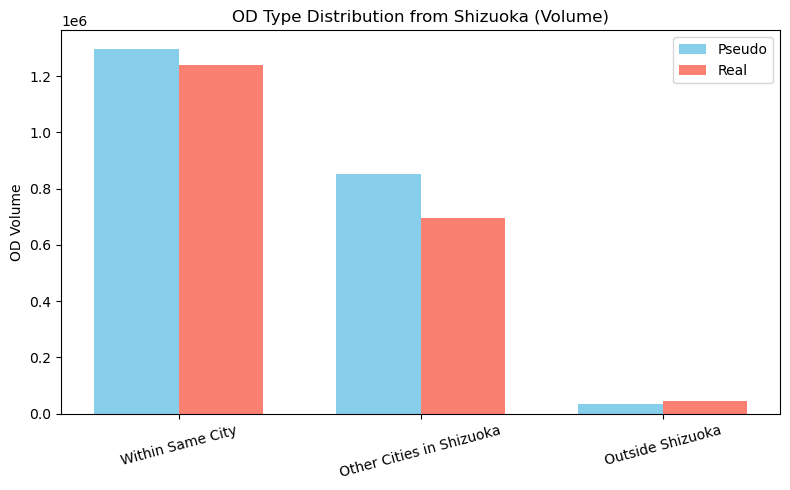

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

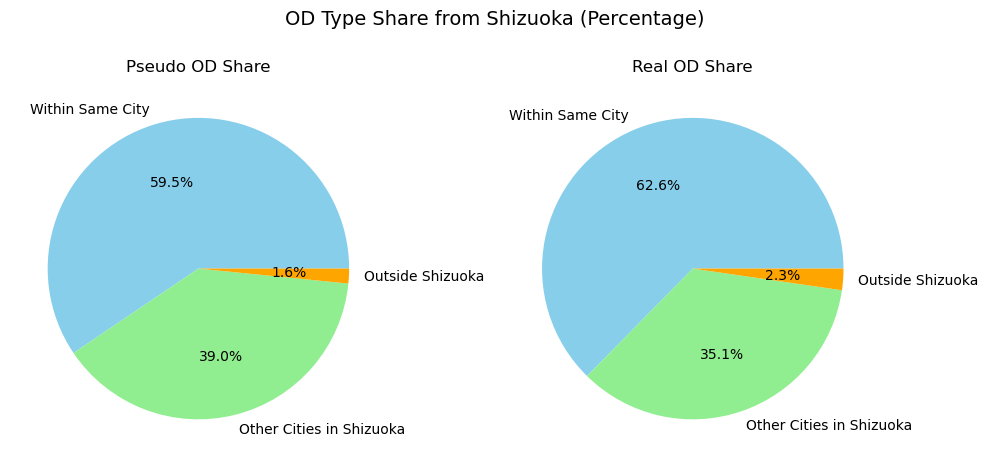

In [96]:
# Á°Æ‰øùÂõæË°®‰∏≠‰ΩøÁî®Ëã±ËØ≠
category_map = {
    'Â∏ÇÂÜÖ': 'Within Same City',
    'ÁúåÂÜÖÂ∏ÇÁî∫ÊùëÈñì': 'Other Cities in Shizuoka',
    'ÁúåÂ§ñ': 'Outside Shizuoka'
}

df_stat['category_en'] = df_stat['category'].map(category_map)

# Bar chart: volume comparison
plt.figure(figsize=(8, 5))
bar_width = 0.35
x = range(len(df_stat))

plt.bar(x, df_stat['pseudo_volume'], width=bar_width, label='Pseudo', color='skyblue')
plt.bar([i + bar_width for i in x], df_stat['real_volume'], width=bar_width, label='Real', color='salmon')

plt.xticks([i + bar_width / 2 for i in x], df_stat['category_en'], rotation=15)
plt.ylabel('OD Volume')
plt.title('OD Type Distribution from Shizuoka (Volume)')
plt.legend()
plt.tight_layout()
plt.show()

# Pie chart: share comparison
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Pseudo
axs[0].pie(df_stat['pseudo_pct'], labels=df_stat['category_en'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'orange'])
axs[0].set_title('Pseudo OD Share')

# Real
axs[1].pie(df_stat['real_pct'], labels=df_stat['category_en'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'orange'])
axs[1].set_title('Real OD Share')

plt.suptitle('OD Type Share from Shizuoka (Percentage)', fontsize=14)
plt.tight_layout()
plt.show()

In [84]:
pseudo_od

city1  city2  pseudo_volume
1454  22101  14203             22
1455  22101  14206             16
1456  22101  14211             18
1457  22101  14212              1
1458  22101  14214              4
...     ...    ...            ...
4602  22461  23234              1
4603  22461  23236              1
4604  22461  23238              3
4605  22461  23446              2
4606  22461  23562              2

[3153 rows x 3 columns]

In [22]:
# root = '/mnt/large/data/PseudoPFLOW/ver2.0/trip/22/'
root = "C:/Data/PseudoPFLOW/trip/22/"
shizuoka = []

for filename in os.listdir(root):
    df = pd.read_csv(root+filename, names=['pid', 'time', 'origin_lon', 'origin_lat', 'destn_lon', 'destn_lat', 'transport', 'puropse', 'occupation'])
    shizuoka.append(df)
    
shizuoka = pd.concat(shizuoka, axis=0)
shizuoka

trip_22101.csv
trip_22102.csv
trip_22103.csv
trip_22131.csv
trip_22132.csv
trip_22133.csv
trip_22134.csv
trip_22135.csv
trip_22136.csv
trip_22137.csv
trip_22203.csv
trip_22205.csv
trip_22206.csv
trip_22207.csv
trip_22208.csv
trip_22209.csv
trip_22210.csv
trip_22211.csv
trip_22212.csv
trip_22213.csv
trip_22214.csv
trip_22215.csv
trip_22216.csv
trip_22219.csv
trip_22220.csv
trip_22221.csv
trip_22222.csv
trip_22223.csv
trip_22224.csv
trip_22225.csv
trip_22226.csv
trip_22301.csv
trip_22302.csv
trip_22304.csv
trip_22305.csv
trip_22306.csv
trip_22325.csv
trip_22341.csv
trip_22342.csv
trip_22344.csv
trip_22424.csv
trip_22429.csv
trip_22461.csv


pid   time  origin_lon  origin_lat   destn_lon  destn_lat  \
0      66218309  19649  138.416206   35.001436  138.528819  35.055189   
1      66218309  24855  138.528819   35.055189  138.532404  35.058117   
2      66218309  24060  138.532404   35.058117  138.424571  35.007414   
3      66218309  78118  138.424571   35.007414  138.416206  35.001436   
4      66218313  27428  138.410979   35.003842  138.411279  34.980186   
...         ...    ...         ...         ...         ...        ...   
52739  69852401  59185  137.932059   34.833128  137.810161  34.842571   
52740  69852401  60085  137.810161   34.842571  137.932059  34.833128   
52741  69852414  25392  137.932779   34.834391  137.891280  34.824951   
52742  69852414  36336  137.891280   34.824951  138.013742  34.770102   
52743  69852414  55749  138.013742   34.770102  137.932779  34.834391   

       transport  puropse  occupation  
0              2        3          21  
1              1      400          21  
2              3        2          21  
3              3        1          21  
4              3        2          21  
...          ...      ...         ...  
52739          3      400          15  
52740          3        1          15  
52741          3        3          11  
52742          1        2          11  
52743          3        1          11  

[10521468 rows x 9 columns]

In [23]:
shizuoka = shizuoka[(shizuoka['puropse']==2)|(shizuoka['puropse']==3)]
shizuoka

pid   time  origin_lon  origin_lat   destn_lon  destn_lat  \
0      66218309  19649  138.416206   35.001436  138.528819  35.055189   
2      66218309  24060  138.532404   35.058117  138.424571  35.007414   
4      66218313  27428  138.410979   35.003842  138.411279  34.980186   
9      66218317  24088  138.413371   35.003699  138.390789  34.974043   
10     66218322  23761  138.413371   35.003699  138.394062  34.981854   
...         ...    ...         ...         ...         ...        ...   
52733  69852401  18004  137.932059   34.833128  137.931085  34.831401   
52734  69852401  18162  137.931085   34.831401  138.440889  35.002206   
52735  69852401  23819  138.440889   35.002206  138.426185  35.013569   
52741  69852414  25392  137.932779   34.834391  137.891280  34.824951   
52742  69852414  36336  137.891280   34.824951  138.013742  34.770102   

       transport  puropse  occupation  
0              2        3          21  
2              3        2          21  
4              3        2          21  
9              1        2          21  
10             3        2          21  
...          ...      ...         ...  
52733          1        3          15  
52734          4        3          15  
52735          1        3          15  
52741          3        3          11  
52742          1        2          11  

[2209795 rows x 9 columns]

In [24]:
gdf_pref = gpd.read_file('prefectures.geojson')

gdf_origin = gpd.GeoDataFrame(
    shizuoka,
    geometry=gpd.points_from_xy(shizuoka['origin_lon'], shizuoka['origin_lat']),
    crs=gdf_pref.crs
)

gdf_dest = gpd.GeoDataFrame(
    shizuoka,
    geometry=gpd.points_from_xy(shizuoka['destn_lon'], shizuoka['destn_lat']),
    crs=gdf_pref.crs
)

gdf_origin = gpd.sjoin(gdf_origin, gdf_pref[['geometry', 'name']], how='left', predicate='within')
gdf_origin.rename(columns={'name': 'origin_pref'}, inplace=True)

gdf_dest = gpd.sjoin(gdf_dest, gdf_pref[['geometry', 'name']], how='left', predicate='within')
gdf_dest.rename(columns={'name': 'destn_pref'}, inplace=True)

shizuoka['origin_pref'] = gdf_origin['origin_pref']
shizuoka['destn_pref'] = gdf_dest['destn_pref']

od_pref_counts = shizuoka.groupby(['origin_pref', 'destn_pref']).size().reset_index(name='count')

C:\Users\cyoudai\AppData\Local\Temp\2\ipykernel_6628\1406875608.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shizuoka['origin_pref'] = gdf_origin['origin_pref']
C:\Users\cyoudai\AppData\Local\Temp\2\ipykernel_6628\1406875608.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shizuoka['destn_pref'] = gdf_dest['destn_pref']


In [25]:
od_pref_counts

origin_pref destn_pref    count
0          ‰∏âÈáçÁúå        ‰∏âÈáçÁúå        5
1          ‰∏âÈáçÁúå        ÊÑõÁü•Áúå        2
2          ÂçÉËëâÁúå        ÂçÉËëâÁúå        9
3          ÂçÉËëâÁúå        Êù±‰∫¨ÈÉΩ        8
4          ÂçÉËëâÁúå       Á•ûÂ•àÂ∑ùÁúå        1
5          ÂüºÁéâÁúå        ÂçÉËëâÁúå        1
6          ÂüºÁéâÁúå        ÂüºÁéâÁúå       46
7          ÂüºÁéâÁúå        Êù±‰∫¨ÈÉΩ       32
8          Â±±Ê¢®Áúå        ÂüºÁéâÁúå        1
9          Â±±Ê¢®Áúå        Â±±Ê¢®Áúå     1214
10         Â±±Ê¢®Áúå        Êù±‰∫¨ÈÉΩ        9
11         Â±±Ê¢®Áúå       Á•ûÂ•àÂ∑ùÁúå       33
12         Â±±Ê¢®Áúå        ÈùôÂ≤°Áúå     3810
13         Â≤êÈòúÁúå        Â≤êÈòúÁúå       19
14         Â≤êÈòúÁúå        ÊÑõÁü•Áúå        1
15         Â≤êÈòúÁúå        Èï∑ÈáéÁúå        1
16         ÊÑõÁü•Áúå        ‰∏âÈáçÁúå        1
17         ÊÑõÁü•Áúå        Â≤êÈòúÁúå        2
18         ÊÑõÁü•Áúå        ÊÑõÁü•Áúå     3929
19         ÊÑõÁü•Áúå        Èï∑ÈáéÁúå        1
20         ÊÑõÁü•Áúå        ÈùôÂ≤°Áúå     1776
21         Êù±‰∫¨ÈÉΩ        ÂçÉËëâÁúå        8
22         Êù±‰∫¨ÈÉΩ        ÂüºÁéâÁúå       17
23         Êù±‰∫¨ÈÉΩ        Êù±‰∫¨ÈÉΩ     2404
24         Êù±‰∫¨ÈÉΩ       Á•ûÂ•àÂ∑ùÁúå       95
25        Á•ûÂ•àÂ∑ùÁúå        Â±±Ê¢®Áúå       17
26        Á•ûÂ•àÂ∑ùÁúå        Êù±‰∫¨ÈÉΩ      292
27        Á•ûÂ•àÂ∑ùÁúå       Á•ûÂ•àÂ∑ùÁúå     6336
28        Á•ûÂ•àÂ∑ùÁúå        ÈùôÂ≤°Áúå     6932
29         Èï∑ÈáéÁúå        Â±±Ê¢®Áúå        1
30         Èï∑ÈáéÁúå        Â≤êÈòúÁúå        1
31         Èï∑ÈáéÁúå        Èï∑ÈáéÁúå        4
32         ÈùôÂ≤°Áúå        ‰∏âÈáçÁúå       16
33         ÈùôÂ≤°Áúå        ÂçÉËëâÁúå        8
34         ÈùôÂ≤°Áúå        ÂüºÁéâÁúå       94
35         ÈùôÂ≤°Áúå        Â±±Ê¢®Áúå     3141
36         ÈùôÂ≤°Áúå        Â≤êÈòúÁúå       32
37         ÈùôÂ≤°Áúå        ÊÑõÁü•Áúå    12034
38         ÈùôÂ≤°Áúå        Êù±‰∫¨ÈÉΩ     5182
39         ÈùôÂ≤°Áúå       Á•ûÂ•àÂ∑ùÁúå    14079
40         ÈùôÂ≤°Áúå        Èï∑ÈáéÁúå       16
41         ÈùôÂ≤°Áúå        ÈùôÂ≤°Áúå  2146597

In [29]:
!pip install ace-tools

In [30]:
import ace_tools as tools; tools.display_dataframe_to_user(name="Prefecture ODÂàÜÂ∏É", dataframe=od_pref_counts)

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
shizuoka